<a href="https://colab.research.google.com/github/Aniket7773/CreditCardFraud/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Correct handle for the dataset
german_credit_path = kagglehub.dataset_download('uciml/german-credit')

print('Data source import complete.')


100%|██████████| 10.9k/10.9k [00:00<00:00, 17.1MB/s]

Extracting files...
Data source import complete.


In [ ]:

///// /////////////////////////////////////////XGBOOST //////////////////////////////


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb


In [3]:
# Load CSV file
data_path = '/content/german_credit_data.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Preview
print('Sample Data:')
print(df.head())

# Info & Summary
print('\nDataFrame Info:')
print(df.info())

print('\nSummary Statistics:')
print(df.describe(include='all'))

# Drop unnecessary column
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Check for missing values
print('\nMissing values per column:')
print(df.isnull().sum())


Sample Data:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0

In [4]:
# Convert to category
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Feature engineering
median_credit = df['Credit amount'].median()
df['HighCredit'] = (df['Credit amount'] > median_credit).astype(int)

# Prepare features & target
features = ['Age', 'Job', 'Duration', 'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
X = df[features]
y = df['HighCredit']

# One-hot encode
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # Type of objective function for binary classification
    n_estimators=100,  # Number of boosting rounds
    random_state=42,  # Random state for reproducibility
    eval_metric='logloss',  # Evaluation metric (logloss is suitable for binary classification)
    max_depth=6,  # Maximum depth of a tree
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    subsample=0.8,  # Fraction of samples to be used for fitting trees
    colsample_bytree=0.8,  # Fraction of features to be used for each tree
    gamma=0,  # Minimum loss reduction required to make a further partition
    scale_pos_weight=1,  # Controls the balance of positive and negative weights
    reg_alpha=0,  # L2 regularization term
    reg_lambda=1  # L1 regularization term
)

# Train the model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost Prediction Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       155
           1       0.74      0.70      0.72       145

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



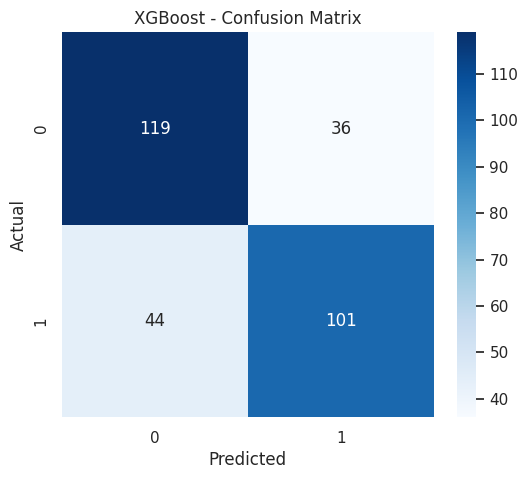

In [8]:
# Predict
y_pred = model_xgb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Prediction Accuracy: {accuracy:.2f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
